Niall Carbery -- 22380966

1) Figure 1 shows a quantum circuit. This quantum circuit is known as the qubit encoding stage used, in
particular, in repetition quantum error correction codes to mitigate phase flipping errors. Assume that
the input state of the data qubit is √3/2 |0⟩ + 1/2 |1⟩. Consider the circuit to be ideal.

(a) What is the density matrix of the 3-qubit state at the output of the circuit?

In [187]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np
import quimb as qu

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

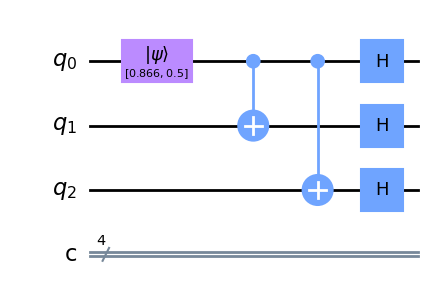

In [188]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

intial_state = np.array([np.sqrt(3)/2, 1/2])

circuit.initialize(intial_state, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[1])
circuit.draw(output='mpl')

Image generated through Qiskit, Output state found numerically while apply swap gates about the 2nd CNOT gate. 

In [189]:
initial_state = np.array([[np.sqrt(3)/2], [1/2]])

indentity = np.array([[1,0],[0,1]])
zero = np.array([[1], [0]])
H_gate = (1/np.sqrt(2))*np.array([[1 ,1], [1, -1]])
swap_gate = np.array([[1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1]])

cnot_gate = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
cnot_gate13 = np.kron(indentity, swap_gate)@np.kron(cnot_gate, indentity)@np.kron(indentity, swap_gate)
triple_H  = np.kron(np.kron(H_gate, H_gate), H_gate)

psi_initial = np.kron(np.kron(initial_state, zero), zero)

psi_out = triple_H@cnot_gate13@np.kron(cnot_gate, indentity)@psi_initial

print('Psi Out > =  \n', psi_out)


Psi Out > =  
 [[0.483]
 [0.129]
 [0.129]
 [0.483]
 [0.129]
 [0.483]
 [0.483]
 [0.129]]


In [190]:
def dagger(state):
    return np.transpose(np.conj(state))

rho = psi_out@dagger(psi_out)

print('Denisty Matrix of Output State: \n', rho)

def is_valid_rho(rho):
    # Check if Hermitian
    is_hermitian   = np.array_equal(dagger(rho), rho)

    # Calculate the trace and check if equal to 1
    trace_rho      = np.isclose(qu.trace(rho), 1)

    # Calculate eigenvalues and check if non-negative
    eigvals_rho    = np.linalg.eigvals(rho)
    eigvals_nonneg = all(eigval > 0 or np.isclose(eigval, 0) for eigval in eigvals_rho)

    # Condition for valid density matrix
    return (is_hermitian and trace_rho and eigvals_nonneg)


print('Valid Denisty Matrix Test: \n', is_valid_rho(rho))

Denisty Matrix of Output State: 
 [[0.233 0.062 0.062 0.233 0.062 0.233 0.233 0.062]
 [0.062 0.017 0.017 0.062 0.017 0.062 0.062 0.017]
 [0.062 0.017 0.017 0.062 0.017 0.062 0.062 0.017]
 [0.233 0.062 0.062 0.233 0.062 0.233 0.233 0.062]
 [0.062 0.017 0.017 0.062 0.017 0.062 0.062 0.017]
 [0.233 0.062 0.062 0.233 0.062 0.233 0.233 0.062]
 [0.233 0.062 0.062 0.233 0.062 0.233 0.233 0.062]
 [0.062 0.017 0.017 0.062 0.017 0.062 0.062 0.017]]
Valid Denisty Matrix Test: 
 True


(b) What is the expected value of the observable operator Z (measuring the qubit in the calculation
basis, along the z-axis of the Bloch sphere) of the first qubit.

In [191]:
#Expected value of observable Z on first quibit

rho_initial = initial_state@dagger(initial_state)

print('Initial Denisty Matrix: \n', rho_initial)

Z_gate = np.array([[1 ,0], [0, -1]])

expected = np.trace(rho_initial@Z_gate)

print('Expected Value of the Observable Opertaor Z:', expected)

Initial Denisty Matrix: 
 [[0.750 0.433]
 [0.433 0.250]]
Expected Value of the Observable Opertaor Z: 0.4999999999999999


(c) What is the state of qubit 1 if you cannot measure qubits 2 and 3?

In [192]:
partial_trace_q1 = qu.ptr(rho, [2,2,2], [0])
print('Partial Trace over Quibit 2 and 3 to find state of Quibit 1:\n', partial_trace_q1)
print('State of quibit 1: \n', np.array([[np.sqrt(partial_trace_q1[0,0])], [np.sqrt(partial_trace_q1[1,1])]]))

Partial Trace over Quibit 2 and 3 to find state of Quibit 1:
 [[0.5  0.25]
 [0.25 0.5 ]]
State of quibit 1: 
 [[0.707]
 [0.707]]


State of Qubit 1 (Subsystem A):

(d) If we cannot measure qubits 2 and 3 (i.e., we trace out subsystems B and C), we focus only on the reduced density matrix for subsystem A.
Where we get equal probabilties of finding |0> and |1>

In [193]:
partial_trace_q3 = qu.ptr(rho, [2,2,2], [2])
print('Partial Trace over Quibit 2 and 3 to find state of Quibit 3:\n', partial_trace_q3)
print('State of quibit 1: \n', np.array([[np.sqrt(partial_trace_q3[0,0])], [np.sqrt(partial_trace_q3[1,1])]]))

Partial Trace over Quibit 2 and 3 to find state of Quibit 3:
 [[0.5  0.25]
 [0.25 0.5 ]]
State of quibit 1: 
 [[0.707]
 [0.707]]


If we cannot measure qubits 1 and 2 (i.e., we trace out subsystems A and B), we focus only on the reduced density matrix for subsystem C.
Where we get equal probabilties of finding |0> and |1> again

(e) Suppose that we applied the measurement from part (b) of this problem on the first qubit at the
output. What is the state of the system after the measurement? What can you say about the
system after the measurement?

In [194]:
z_psi_out = np.kron(np.kron(Z_gate, indentity), indentity)@psi_out
print('Psi Out with Z gate applied: \n', z_psi_out)

Psi Out with X gate applied: 
 [[0.483]
 [0.129]
 [0.129]
 [0.483]
 [-0.129]
 [-0.483]
 [-0.483]
 [-0.129]]


The signs of state |1 .. ..> changed i.e. introducing a phase change. However after encoding, the state of the main qubit is spread across all three qubits.Applying the Z gate to the first qubit modifies the encoded state.The three-qubit code can still correct bit-flip errors even after applying the Z gate. But our |0 .. ..> state of first quibit still preserves the full state.

In [195]:
print(z_psi_out@dagger(z_psi_out))

[[0.233 0.062 0.062 0.233 -0.062 -0.233 -0.233 -0.062]
 [0.062 0.017 0.017 0.062 -0.017 -0.062 -0.062 -0.017]
 [0.062 0.017 0.017 0.062 -0.017 -0.062 -0.062 -0.017]
 [0.233 0.062 0.062 0.233 -0.062 -0.233 -0.233 -0.062]
 [-0.062 -0.017 -0.017 -0.062 0.017 0.062 0.062 0.017]
 [-0.233 -0.062 -0.062 -0.233 0.062 0.233 0.233 0.062]
 [-0.233 -0.062 -0.062 -0.233 0.062 0.233 0.233 0.062]
 [-0.062 -0.017 -0.017 -0.062 0.017 0.062 0.062 0.017]]


The probabilites are preserved along the population diagonal however the coherence have all acquired a sign change in the desnity matrix.